# Take home chanllenge

# Part-3: Predictive modeling

In [1]:
# Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import datetime

In [2]:
# Import dataset
data = pd.read_json('ultimate_data_challenge.json')

In [3]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
data.shape

(50000, 12)

In [5]:
data.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Explorotory Data Analyis

In [7]:
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [8]:
data.nunique()

city                         3
trips_in_first_30_days      59
signup_date                 31
avg_rating_of_driver        37
avg_surge                  115
last_trip_date             182
phone                        2
surge_pct                  367
ultimate_black_user          2
weekday_pct                666
avg_dist                  2908
avg_rating_by_driver        27
dtype: int64

In [9]:
data.city.nunique()

3

In [10]:
data.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [11]:
data.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

In [12]:
data.phone.value_counts(dropna = False)

iPhone     34582
Android    15022
NaN          396
Name: phone, dtype: int64

In [13]:
data.ultimate_black_user.unique()

array([ True, False])

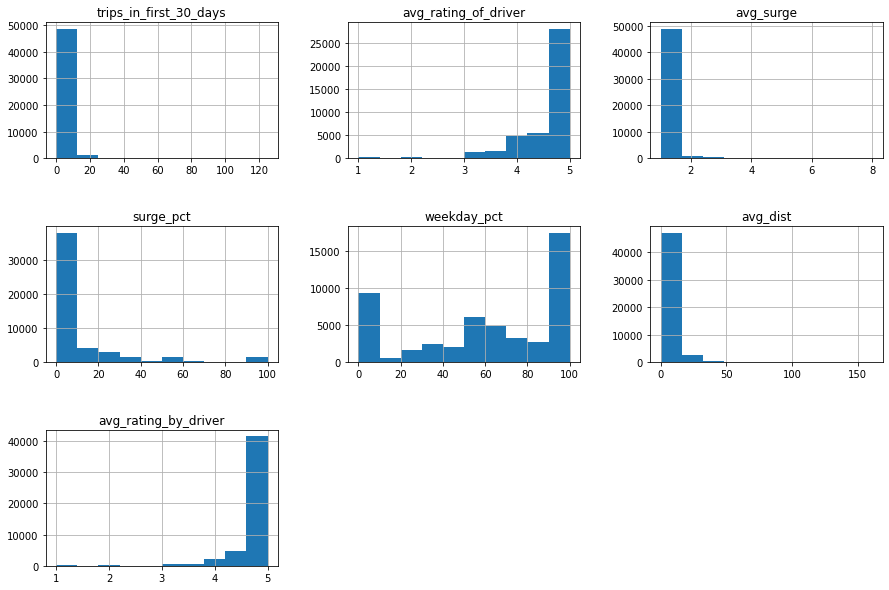

In [14]:
# Plot the histograms of numerical data
data2 = data[['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge', 'surge_pct',
       'weekday_pct', 'avg_dist',
       'avg_rating_by_driver']]

data2.hist(figsize = (15, 10))
plt.subplots_adjust(hspace = 0.5)
plt.show()

### Replacing missing values

In [15]:
data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

**Note: Avg_rating_of_driver seems to play important role in prediction, hence we can not delete the entire column. However we can see from describe() output that  only 25% values are below 4.3, rest is more than this. In such a case, we can replace the missing values by 4.3 or > 4.3.** <br><br>
**Avg_rating_by_driver column also seems to play an important role in the prediction, hence we can not delete this column also. However as metioned in earlier case, we can see from describe() output that  only 25% values are below 4.7, rest is more than this. In such a case, we can replace the missing values by 4.7 or > 4.7.**<br><br>
**The number of missing phone is very few, also it seems it doesn't matter which phone the driver has, as both phones are eaqually good for communications and required services as far as it related to booking/trips/providing ratings etc. Hence the missing values can be deleted.** 

In [16]:
data.replace({'avg_rating_of_driver': np.nan}, 4.3, inplace = True)

In [17]:
data.isnull().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver      201
dtype: int64

In [18]:
data.replace({'avg_rating_by_driver': np.nan}, 4.7, inplace = True)
data.isnull().sum()

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
dtype: int64

In [19]:
data.shape

(50000, 12)

In [20]:
data.dropna(inplace = True)

In [21]:
data.shape

(49604, 12)

In [22]:
data.phone.value_counts(dropna = False)

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [24]:
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000
mean,2.277256,4.552689,1.074991,8.875314,60.883832,5.785418,4.777550
std,3.793300,0.576028,0.222666,19.989018,37.086239,5.669709,0.446247
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.700000,100.000000,6.930000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [25]:
# Derive correlation between numerical features
data2 = data[['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge', 'surge_pct',
       'weekday_pct', 'avg_dist',
       'avg_rating_by_driver']]
corr = data2.corr()
corr

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,1.000000,0.026565,-0.001934,0.005548,0.050791,-0.136830,-0.038627
avg_rating_of_driver,0.026565,1.000000,-0.022742,-0.002096,0.015969,0.003032,0.097923
avg_surge,-0.001934,-0.022742,1.000000,0.793409,-0.110199,-0.081693,0.010417
surge_pct,0.005548,-0.002096,0.793409,1.000000,-0.145152,-0.104532,0.020078
weekday_pct,0.050791,0.015969,-0.110199,-0.145152,1.000000,0.102253,0.020190
avg_dist,-0.136830,0.003032,-0.081693,-0.104532,0.102253,1.000000,0.079444
avg_rating_by_driver,-0.038627,0.097923,0.010417,0.020078,0.020190,0.079444,1.000000


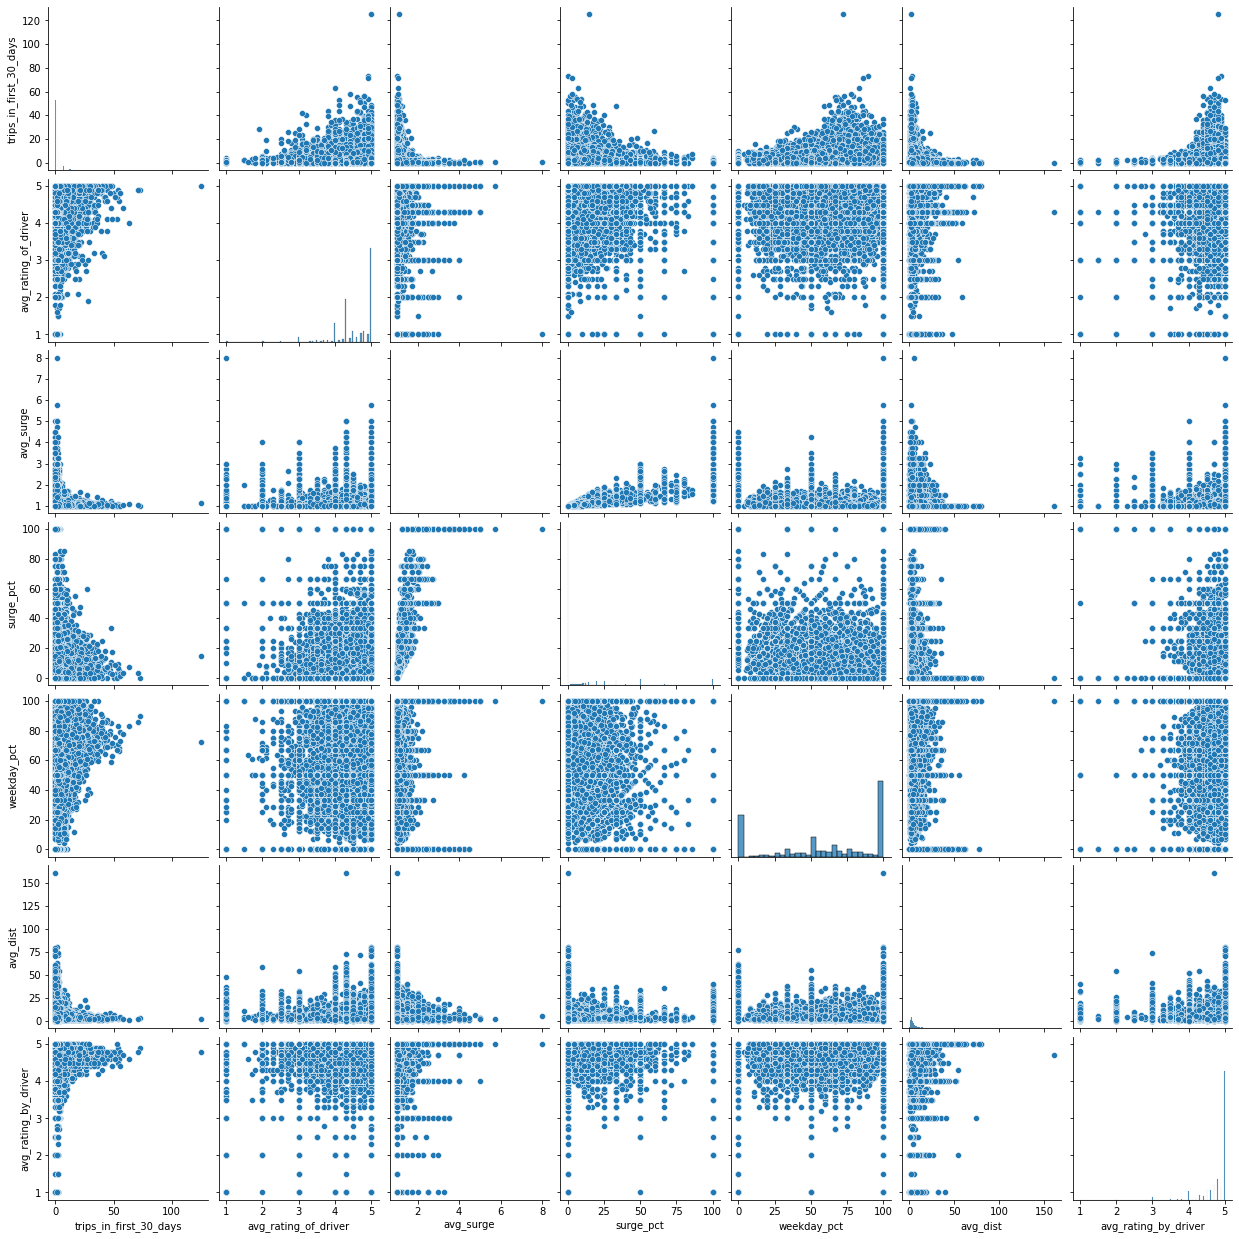

In [26]:
sns.pairplot(data2)
plt.show()

**Note: There seems to be no corelation among the numerical features.**

**Let us replace the 'ultimate_black_user' column values "True" with 1 and "False" with 0.** 

In [27]:
data.replace({'ultimate_black_user': {True: 1, False: 0}}, inplace = True)

In [28]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9


In [29]:
data['duration'] = pd.to_datetime(data['last_trip_date']) - pd.to_datetime(data['signup_date'])

In [30]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,143 days
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,96 days
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,1 days
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,170 days
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,47 days


In [31]:
data['duration'] = data['duration'].dt.days

In [32]:
data.head(3)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,143
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,0,50.0,8.26,5.0,96
2,Astapor,3,2014-01-06,4.3,1.0,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,1


In [33]:
# As both columns are Object, not timestamp, hence we need to change to timestamp

data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

In [34]:
data['signup_date'].dtype, data['last_trip_date'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [35]:
# We need to take out the months from both columns
data['signup_date'] = data['signup_date'].dt.month
data['signup_date'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: signup_date, dtype: int64

In [36]:
data['last_trip_date'] = data['last_trip_date'].dt.month
data['last_trip_date'][:10]

0    6
1    5
2    1
3    6
4    3
5    6
6    1
7    1
8    2
9    1
Name: last_trip_date, dtype: int64

In [37]:
data['signup_date'].value_counts()

1    49604
Name: signup_date, dtype: int64

In [38]:
data['last_trip_date'].value_counts()

6    18126
1    10017
5     7548
4     4568
3     4532
2     4268
7      545
Name: last_trip_date, dtype: int64

Here, we can see that all the signup_dates are in the 1st month of the year while the last_trip_dates are 1-7 months. Here we also need to note that, if a rider continues upto his/her six moths or beyond that, then we'll consider the rider as retained, else not.So in the cells below we are going to categorize the drivers into two groups "reatined" and "not retained" and assign them "1" or "0" respectively. We'll create these two values in "retained" column.  

In [39]:
data.last_trip_date = np.where(data.last_trip_date >= 6, 1, 0)
data.rename(columns = {'last_trip_date':'retained'}, inplace = True)
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,retained,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration
0,King's Landing,4,1,4.7,1.10,1,iPhone,15.4,1,46.2,3.67,5.0,143
1,Astapor,0,1,5.0,1.00,0,Android,0.0,0,50.0,8.26,5.0,96
2,Astapor,3,1,4.3,1.00,0,iPhone,0.0,0,100.0,0.77,5.0,1
3,King's Landing,9,1,4.6,1.14,1,iPhone,20.0,1,80.0,2.36,4.9,170
4,Winterfell,14,1,4.4,1.19,0,Android,11.8,0,82.4,3.13,4.9,47


In [40]:
data.retained.value_counts()

0    30933
1    18671
Name: retained, dtype: int64

In [41]:
data.drop(columns = ['signup_date'], axis = 1, inplace = True)
data.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,retained,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration
0,King's Landing,4,4.7,1.10,1,iPhone,15.4,1,46.2,3.67,5.0,143
1,Astapor,0,5.0,1.00,0,Android,0.0,0,50.0,8.26,5.0,96
2,Astapor,3,4.3,1.00,0,iPhone,0.0,0,100.0,0.77,5.0,1
3,King's Landing,9,4.6,1.14,1,iPhone,20.0,1,80.0,2.36,4.9,170
4,Winterfell,14,4.4,1.19,0,Android,11.8,0,82.4,3.13,4.9,47


In [42]:
data.columns

Index(['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'retained', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct',
       'avg_dist', 'avg_rating_by_driver', 'duration'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   avg_rating_of_driver    49604 non-null  float64
 3   avg_surge               49604 non-null  float64
 4   retained                49604 non-null  int32  
 5   phone                   49604 non-null  object 
 6   surge_pct               49604 non-null  float64
 7   ultimate_black_user     49604 non-null  int64  
 8   weekday_pct             49604 non-null  float64
 9   avg_dist                49604 non-null  float64
 10  avg_rating_by_driver    49604 non-null  float64
 11  duration                49604 non-null  int64  
dtypes: float64(6), int32(1), int64(3), object(2)
memory usage: 4.7+ MB


In [44]:
data.shape

(49604, 12)

# Get dummies variables from categorical columns

Let us obtain the dummy features in categorical variables. One can use get_dummies to convert the categorical variables to dummy variables, however, it fails when it is applied in an unseen dataset with new categorical value in a column. 

In [45]:
#from sklearn.preprocessing import OneHotEncoder

In [46]:
#OHT = OneHotEncoder()
#a = OHT.fit_transform(X_train[['city']])
#print(a[:10])
#OHT.categories_
# Convert that into dataframe
#b = pd.DataFrame(data = a, index = X_train.index, columns = OHT.categories_)
#b.head(10)

In [47]:
#X_test.city = label.fit_transform(X_test.city)
#X_test.head()

In [48]:
#Let us now carry out the OneHotEncoder following LabelEncoder
#For this we need to convert out LabelEncoded Dataframe X_train and X_test to 2-Dimensional array
#as OneHotEncoder does not work on Dataframe but on 2-Dimensional array.
#X_train.city


In [49]:
#enc = OneHotEncoder()
#enc.fit(X_train)
#data2.ci = enc.transform(X_train).toarray()

# Alternate to OneHotEncoder: get_dummies

In [50]:
data = pd.get_dummies(data)

In [51]:
data.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,retained,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,1,15.4,1,46.2,3.67,5.0,143,0,1,0,0,1
1,0,5.0,1.00,0,0.0,0,50.0,8.26,5.0,96,1,0,0,1,0
2,3,4.3,1.00,0,0.0,0,100.0,0.77,5.0,1,1,0,0,0,1
3,9,4.6,1.14,1,20.0,1,80.0,2.36,4.9,170,0,1,0,0,1
4,14,4.4,1.19,0,11.8,0,82.4,3.13,4.9,47,0,0,1,1,0


In [52]:
data.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'retained', 'surge_pct', 'ultimate_black_user', 'weekday_pct',
       'avg_dist', 'avg_rating_by_driver', 'duration', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'phone_Android',
       'phone_iPhone'],
      dtype='object')

In [53]:
data.shape

(49604, 15)

# Train test split

Among these columns,  "retained" will be the target, while other columns will be the predictors.let us carry out the train_test_split and model development on this dataset.

In [54]:
X = data[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct',
       'avg_dist', 'avg_rating_by_driver', 'duration', 'city_Astapor',
       "city_King's Landing", 'city_Winterfell', 'phone_Android',
       'phone_iPhone']]
y = data['retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [55]:
X_train.shape, X_test.shape

((34722, 14), (14882, 14))

In [56]:
y_train.shape, y_test.shape

((34722,), (14882,))

# Scaling the feature variables

In [57]:
X_train_to_scale = X_train[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct','avg_dist', 'avg_rating_by_driver', 'duration']]

X_test_to_scale = X_test[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct','avg_dist', 'avg_rating_by_driver', 'duration']]

In [58]:
sc = StandardScaler()
sc.fit(X_train_to_scale)
X_train_scaled = sc.transform(X_train_to_scale)
X_test_scaled = sc.transform(X_test_to_scale)

In [59]:
X_train.loc[:, ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct','avg_dist', 'avg_rating_by_driver', 'duration']] = X_train_scaled

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [60]:
X_train.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
48436,-0.605042,-0.436081,-0.333381,-0.441442,0,-1.645133,-0.790801,0.497854,0.451724,0,0,1,0,1
42338,-0.340258,0.772485,-0.333381,-0.441442,0,1.050902,-0.453812,0.497854,-1.221236,0,0,1,0,1
20178,0.454096,0.254528,-0.110602,0.147607,1,0.258267,-0.647624,-0.621896,0.548241,1,0,0,0,1
10096,1.248450,-0.954038,-0.244269,-0.126950,0,-0.127266,0.560647,-0.397946,-0.014775,0,0,1,1,0
34092,-0.340258,-0.436081,0.780515,2.888185,0,-0.747354,-0.551591,-0.173996,0.869964,0,1,0,0,1


In [61]:
X_test.loc[:, ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge','surge_pct', 'weekday_pct','avg_dist', 'avg_rating_by_driver', 'duration']] = X_test_scaled
X_test.head()

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,duration,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
32027,-0.605042,0.772485,-0.333381,-0.441442,0,0.153122,2.123369,0.497854,0.306948,0,0,1,1,0
21429,0.454096,-0.090776,-0.333381,-0.441442,0,1.050902,1.517487,0.049954,-0.384756,0,0,1,0,1
12723,-0.075473,0.772485,0.780515,2.054531,0,-1.645133,-0.603973,-1.741646,-1.478615,0,0,1,1,0
19995,-0.075473,-0.436081,-0.021490,-0.087014,0,0.473950,-0.572544,0.049954,0.853878,0,1,0,0,1
735,0.189312,0.254528,-0.333381,-0.441442,0,-0.146138,-0.521908,0.273904,1.111256,0,1,0,1,0


# Model development

## 1. Logistic regression

In [62]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [63]:
print('Classification report:\n', classification_report(y_test, y_predict, labels = [1, 0], target_names = ['Yes', 'No']))

Classification report:
               precision    recall  f1-score   support

         Yes       0.93      0.96      0.94      5562
          No       0.97      0.96      0.97      9320

    accuracy                           0.96     14882
   macro avg       0.95      0.96      0.96     14882
weighted avg       0.96      0.96      0.96     14882



In [64]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix:\n", confusion_matrix(y_test, y_predict, labels = [1, 0]))

Confusion matrix:
 [[5320  242]
 [ 383 8937]]


In [65]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_predict, labels = [1, 0], normalize = 'true'))

Confusion matrix:
 [[0.95649047 0.04350953]
 [0.04109442 0.95890558]]


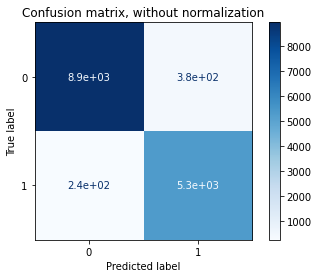

In [66]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test, cmap = plt.cm.Blues)
plt.title("Confusion matrix, without normalization")
plt.show()

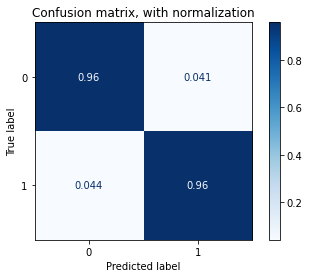

In [67]:
plot_confusion_matrix(lr, X_test, y_test, normalize = 'true', cmap = plt.cm.Blues)
plt.title("Confusion matrix, with normalization")
plt.show()

In [68]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict, labels = [1, 0]).ravel()
tn, fp, fn, tp

(5320, 242, 383, 8937)

#### GridSearchCV and RandomizedSearchCV with Logistic regression 

In [69]:
# GridSeachCV
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state = 42)
start = datetime.datetime.now()
parameters = {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l1', 'l2', 'elasticnet', 'none']}
lr_gridsearchcv = GridSearchCV(lr, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
lr_gridsearchcv.fit(X_train, y_train)
print("Best estimator\n: ", lr_gridsearchcv.best_estimator_, "\n\n Best parameters \n:", lr_gridsearchcv.best_params_, "\n\n Best accuracy score \n:", lr_gridsearchcv.best_score_) 
end = datetime.datetime.now()
print(start, end)

Best estimator
:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False) 

 Best parameters 
: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'} 

 Best accuracy score 
: 0.9606303145517945
2021-09-29 14:30:56.830894 2021-09-29 14:32:43.916769


In [70]:
lr2 = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'newton-cg', random_state = 42)
lr2.fit(X_train, y_train)
y_predict_lr2 = lr2.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_predict_lr2, labels = [1, 0], target_names = ['Yes', 'No']))

Classification report:
               precision    recall  f1-score   support

         Yes       0.93      0.96      0.94      5562
          No       0.97      0.96      0.97      9320

    accuracy                           0.96     14882
   macro avg       0.95      0.96      0.96     14882
weighted avg       0.96      0.96      0.96     14882



In [71]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression(random_state = 42)
start = datetime.datetime.now()
parameters = {'C': np.linspace(0.1, 10, 10), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l1', 'l2', 'elasticnet', 'none']}
lr_Randomizedsearchcv = RandomizedSearchCV(lr, param_distributions = parameters, scoring = 'accuracy', n_jobs = -1, random_state = 42)
lr_Randomizedsearchcv.fit(X_train, y_train)
print("Best estimator:\n", lr_Randomizedsearchcv.best_estimator_, "\n \n Best parameters:\n", lr_Randomizedsearchcv.best_params_, "\n\n Best accuracy score:\n", lr_Randomizedsearchcv.best_score_)
end = datetime.datetime.now()
print(start, end)

Best estimator:
 LogisticRegression(C=6.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False) 
 
 Best parameters:
 {'solver': 'sag', 'penalty': 'l2', 'C': 6.7} 

 Best accuracy score:
 0.9597951191554446
2021-09-29 14:32:44.546855 2021-09-29 14:33:00.101927


In [73]:
lr3 = LogisticRegression(solver = 'sag', penalty = 'l2', C = 6.7, random_state = 42)
lr3.fit(X_train, y_train)
y_predict_lr3 = lr3.predict(X_test)
print('Classification report:\n', classification_report(y_test, y_predict_lr3, labels = [1, 0], target_names = ['Yes', 'No']))

Classification report:
               precision    recall  f1-score   support

         Yes       0.93      0.96      0.94      5562
          No       0.97      0.96      0.97      9320

    accuracy                           0.96     14882
   macro avg       0.95      0.96      0.96     14882
weighted avg       0.96      0.96      0.96     14882



## 2. Gradient Boosting Classifier

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = 42)
gbc.fit(X_train, y_train)
y_predict_gbc = gbc.predict(X_test)
print("Clasiification report: \n", classification_report(y_test, y_predict_gbc, labels = [1, 0],  target_names = ['Yes', 'No']))

Clasiification report: 
               precision    recall  f1-score   support

         Yes       0.93      0.96      0.95      5562
          No       0.97      0.96      0.97      9320

    accuracy                           0.96     14882
   macro avg       0.95      0.96      0.96     14882
weighted avg       0.96      0.96      0.96     14882



In [75]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_predict_gbc, labels = [1, 0]))

Confusion matrix:
 [[5320  242]
 [ 372 8948]]


In [76]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_gbc, labels = [1, 0]).ravel()
tn, fp, fn, tp

(5320, 242, 372, 8948)

#### GridSeachCV and RandomizedSearchCV with Gradient Boosting Classifier 

In [77]:
start = datetime.datetime.now()
gbc = GradientBoostingClassifier(random_state = 42)
max_features = list(range(1, len(X_train.columns)))
n_estimators = [100, 200, 300] 
max_depth = [3, 5]
parameters = {'max_features' : max_features, 'n_estimators': n_estimators, 'max_depth': max_depth}
gbc_gridsearch = GridSearchCV(gbc, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
gbc_gridsearch.fit(X_train, y_train)
end = datetime.datetime.now()
print(start, end)

2021-09-29 14:34:47.817261 2021-09-29 14:51:14.405191


In [78]:
print("Best parameters:\n", gbc_gridsearch.best_params_, "\n \n Best_score:\n", gbc_gridsearch.best_score_) 

Best parameters:
 {'max_depth': 3, 'max_features': 1, 'n_estimators': 300} 
 
 Best_score:
 0.9611199002697296


In [79]:
gbc2 = GradientBoostingClassifier(max_depth = 3, max_features= 9, n_estimators= 100, random_state = 42)
gbc2.fit(X_train, y_train)
y_predict_gbc2 = gbc2.predict(X_test)
print("Clasiification report: \n", classification_report(y_test, y_predict_gbc2,  target_names = ['Yes', 'No']))

Clasiification report: 
               precision    recall  f1-score   support

         Yes       0.97      0.96      0.97      9320
          No       0.93      0.96      0.95      5562

    accuracy                           0.96     14882
   macro avg       0.95      0.96      0.96     14882
weighted avg       0.96      0.96      0.96     14882



In [80]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_predict_gbc2, labels = [1, 0]))

Confusion matrix:
 [[5322  240]
 [ 378 8942]]


In [81]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_gbc2, labels = [1, 0]).ravel()
tn, fp, fn, tp

(5322, 240, 378, 8942)

In [83]:
start = datetime.datetime.now()
gbc = GradientBoostingClassifier(random_state = 42)
max_features = np.linspace(1, len(X_train.columns)+1, 14)
n_estimators = [100, 200, 300]
max_depth = [3, 5]
parameters = {'max_features' : max_features, 'n_estimators': n_estimators, 'max_depth': max_depth}
gbc_randomized = RandomizedSearchCV(gbc, param_distributions = parameters, scoring = 'accuracy', n_jobs = -1)
gbc_randomized.fit(X_train, y_train)
print("Best parameters: \n", gbc_randomized.best_params_, "\n \n Best_score:\n", gbc_randomized.best_score_) 
end = datetime.datetime.now()
print(start, end)

Best parameters: 
 {'n_estimators': 100, 'max_features': 1.0, 'max_depth': 3} 
 
 Best_score:
 0.9606303352874628
2021-09-29 14:54:50.959257 2021-09-29 14:55:10.464143


In [84]:
gbc3 = GradientBoostingClassifier(n_estimators = 100, max_features = 1.0, max_depth = 3, random_state = 42)
gbc3.fit(X_train, y_train)
y_predict_gbc3 = gbc3.predict(X_test)
print("Clasiification report: \n", classification_report(y_test, y_predict_gbc3,  target_names = ['Yes', 'No']))

Clasiification report: 
               precision    recall  f1-score   support

         Yes       0.97      0.96      0.97      9320
          No       0.93      0.96      0.95      5562

    accuracy                           0.96     14882
   macro avg       0.95      0.96      0.96     14882
weighted avg       0.96      0.96      0.96     14882



In [85]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_predict_gbc3, labels = [1, 0]))

Confusion matrix:
 [[5320  242]
 [ 372 8948]]


In [86]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_gbc3, labels = [1, 0]).ravel()
tn, fp, fn, tp

(5320, 242, 372, 8948)

# Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train, y_train)
y_predict_decision_tree = decision_tree.predict(X_test)
print("Clasiification report: \n", classification_report(y_test, y_predict_decision_tree, labels = [1, 0], target_names = ["Yes", "No"]))

Clasiification report: 
               precision    recall  f1-score   support

         Yes       0.92      0.92      0.92      5562
          No       0.95      0.95      0.95      9320

    accuracy                           0.94     14882
   macro avg       0.93      0.94      0.94     14882
weighted avg       0.94      0.94      0.94     14882



In [88]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_predict_decision_tree, labels = [1, 0]))

Confusion matrix:
 [[5124  438]
 [ 466 8854]]


In [89]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_decision_tree, labels = [1, 0]).ravel()
tn, fp, fn, tp

(5124, 438, 466, 8854)

#### GridSeachCV and RandomizedSearchCV with DecisionTreeClassifier 

In [90]:
# applying GridSearchCV
start = datetime.datetime.now()
decision_tree = DecisionTreeClassifier(random_state = 42)
max_depth = [2, 3, 5]
criterion = ['gini', 'entropy']
max_features = list(range(1, len(X_train.columns)))
parameters = {'max_depth': max_depth, 'criterion':criterion, 'max_features': max_features }
decision_grid = GridSearchCV(decision_tree, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
decision_grid.fit(X_train, y_train)
end = datetime.datetime.now()
print("Best parameter: ", decision_grid.best_params_, "Best score", decision_grid.best_score_)
print(start, end)

Best parameter:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 13} Best score 0.9574334260632421
2021-09-29 15:01:35.000872 2021-09-29 15:01:50.069983


In [91]:
# Apply the best hyperparameter from above GridSearchCV 
decision_tree2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_features = 13, random_state = 42)
decision_tree2.fit(X_train, y_train)
y_predict_decision_tree2 = decision_tree2.predict(X_test)
print(classification_report(y_test, y_predict_decision_tree2, labels = [1, 0], target_names = ["Yes", "No"]))

              precision    recall  f1-score   support

         Yes       0.94      0.95      0.94      5562
          No       0.97      0.96      0.97      9320

    accuracy                           0.96     14882
   macro avg       0.95      0.95      0.95     14882
weighted avg       0.96      0.96      0.96     14882



In [92]:
confusion_matrix(y_test, y_predict_decision_tree2, labels = [1, 0])

array([[5269,  293],
       [ 357, 8963]], dtype=int64)

In [93]:
confusion_matrix(y_test, y_predict_decision_tree2, labels = [1, 0], normalize = 'true')

array([[0.94732111, 0.05267889],
       [0.03830472, 0.96169528]])

In [ ]:
# applying RandomizedSearchCV, I think there is no need to apply Randomized search 
#start = datetime.datetime.now()
#decision_tree = DecisionTreeClassifier()
#max_depth = [2, 3, 5]
#criterion = ['gini', 'entropy']
#max_features = list(range(1, len(X_train.columns)))
#parameters = {'max_depth': max_depth, 'criterion':criterion, 'max_features': max_features }
#decision_grid = GridSearchCV(decision_tree, param_distributions = parameters, scoring = 'accuracy')
#decision_grid.fit(X_train, y_train)
#end = datetime.datetime.now()
#print("Best parameter: ", decision_grid.best_params_, "Best score", decision_grid.best_score_)
#print(start, end)

# Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state = 42)
RFC.fit(X_train, y_train)
y_predict_RFC = RFC.predict(X_test)
print(classification_report(y_test, y_predict_RFC, labels = [1, 0], target_names = ["Yes", "No"]))

              precision    recall  f1-score   support

         Yes       0.94      0.95      0.94      5562
          No       0.97      0.96      0.97      9320

    accuracy                           0.96     14882
   macro avg       0.95      0.96      0.95     14882
weighted avg       0.96      0.96      0.96     14882



In [95]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_predict_RFC, labels = [1, 0]))

Confusion matrix:
 [[5288  274]
 [ 363 8957]]


In [96]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_RFC, labels = [1, 0]).ravel()
tn, fp, fn, tp

(5288, 274, 363, 8957)

#### GridSeachCV and RandomizedSearchCV with RandomForestClassifier 

In [97]:
from sklearn.ensemble import RandomForestClassifier
start = datetime.datetime.now()
RFC2 = RandomForestClassifier(random_state = 42)
n_estimators= [100]
criterion=['gini', 'entropy']
max_depth = [2, 3, 5]
max_features = list(range(1, len(X_train.columns)))
parameters = {'n_estimators':  n_estimators, 'criterion': criterion, 'max_depth': max_depth, 'max_features': max_features}
RFC2_cv = GridSearchCV(RFC2, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
RFC2_cv.fit(X_train, y_train)
end = datetime.datetime.now()
print("Best parameter: ", RFC2_cv.best_params_, "Best score", RFC2_cv.best_score_)
print(start, end)

Best parameter:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 12, 'n_estimators': 100} Best score 0.960111980903279
2021-09-29 15:07:08.925094 2021-09-29 15:11:55.541474


In [98]:
RFC3 = RandomForestClassifier(criterion = 'gini', max_depth = 5, max_features = 12, n_estimators = 100, random_state = 42)
RFC3.fit(X_train, y_train)
y_predict_RFC3 = RFC3.predict(X_test)

In [99]:
print(classification_report(y_test, y_predict_RFC3, labels = [1, 0], target_names = ["Yes", "No"]))

              precision    recall  f1-score   support

         Yes       0.93      0.96      0.94      5562
          No       0.98      0.96      0.97      9320

    accuracy                           0.96     14882
   macro avg       0.95      0.96      0.95     14882
weighted avg       0.96      0.96      0.96     14882



In [100]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_predict_RFC3, labels = [1, 0]))

Confusion matrix:
 [[5337  225]
 [ 407 8913]]


In [101]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_RFC3, labels = [1, 0]).ravel()
tn, fp, fn, tp

(5337, 225, 407, 8913)

# Support Vector Classifier

In [102]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
y_predict_svc = svc.predict(X_test)

In [103]:
print(classification_report(y_test, y_predict_svc, labels = [1, 0], target_names = ["Yes", "No"]))

              precision    recall  f1-score   support

         Yes       0.93      0.96      0.94      5562
          No       0.97      0.96      0.97      9320

    accuracy                           0.96     14882
   macro avg       0.95      0.96      0.95     14882
weighted avg       0.96      0.96      0.96     14882



#### GridSeachCV and RandomizedSearchCV with Support Vector Classifier 

In [104]:
start = datetime.datetime.now()
svc2 = SVC(random_state = 42)
C = [0.1, 1, 10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [3, 4, 5]
parameters = {'C': C, 'kernel': kernel, 'degree': degree}
svc_grid = GridSearchCV(svc2, param_grid = parameters, scoring = 'accuracy')
svc_grid.fit(X_train, y_train)
print("Best parameter: ", svc_grid.best_params_, "Best score", svc_grid.best_score_)
end = datetime.datetime.now()
print(start, end)

Best parameter:  {'C': 0.1, 'degree': 3, 'kernel': 'linear'} Best score 0.9607455011893979
2021-09-29 15:32:22.699050 2021-09-29 16:21:28.372567


In [105]:
# svc with BEST parameters from GridSearchCV
svc3 = SVC(C = 0.1, degree = 3, kernel = 'linear', random_state = 42)
svc3.fit(X_train, y_train)
y_predict_svc3= svc3.predict(X_test)
print(classification_report(y_test, y_predict_svc3, labels = [1, 0], target_names = ["Yes", "No"]))

              precision    recall  f1-score   support

         Yes       0.93      0.96      0.94      5562
          No       0.97      0.96      0.97      9320

    accuracy                           0.96     14882
   macro avg       0.95      0.96      0.96     14882
weighted avg       0.96      0.96      0.96     14882



In [106]:
start = datetime.datetime.now()
svc4 = SVC(random_state = 42)
C = np.linspace(0.01, 10, 10)
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [3, 4, 5]
parameters = {'C': C, 'kernel': kernel, 'degree': degree}
svc_randomized = RandomizedSearchCV(svc4, param_distributions = parameters, scoring = 'accuracy', n_jobs = -1)
svc_randomized.fit(X_train, y_train)
print("Best parameter: ", svc_randomized.best_params_, "Best score", svc_randomized.best_score_)
end = datetime.datetime.now()
print(start, end)

Best parameter:  {'kernel': 'linear', 'degree': 4, 'C': 2.23} Best score 0.960457511786154
2021-09-29 16:23:51.001752 2021-09-29 16:27:54.663305


In [107]:
# svc with BEST parameters from RandomizedSearchCV
svc5 = SVC(C = 2.23, degree = 4, kernel = 'linear', random_state = 42)
svc5.fit(X_train, y_train)
y_predict_svc5 = svc5.predict(X_test)
print(classification_report(y_test, y_predict_svc5, labels = [1, 0], target_names = ["Yes", "No"]))

              precision    recall  f1-score   support

         Yes       0.93      0.96      0.94      5562
          No       0.97      0.96      0.97      9320

    accuracy                           0.96     14882
   macro avg       0.95      0.96      0.96     14882
weighted avg       0.96      0.96      0.96     14882



Let us make a dataframe of the scores till now we obtained with the different classifiers:

In [110]:
score_data = {'accuracy score':[0.96, 0.96, 0.96, 0.96, 0.96],
              'Precision_Yes': [0.93, 0.97, 0.94, 0.94, 0.93],
              'Precision_No':  [0.97, 0.93, 0.97, 0.97, 0.97],
              'Recall_Yes':    [0.96, 0.96, 0.95, 0.95, 0.96],
              'Recall_No':     [0.96, 0.96, 0.96, 0.96, 0.96],
              'f1_score_Yes':  [0.94, 0.97, 0.94, 0.94, 0.94],
              'f1_score_No':   [0.97, 0.95,  0.97, 0.97, 0.97]}
              
              
score_dataframe = pd.DataFrame(score_data,  
            index = ['logistic regression', 'Gradient Boosting Classifier', 'Decision Tree clasiifier', 'Random Forest Classifier', 'Support Vector Classifier'])
score_dataframe

,accuracy score,Precision_Yes,Precision_No,Recall_Yes,Recall_No,f1_score_Yes,f1_score_No
logistic regression,0.96,0.93,0.97,0.96,0.96,0.94,0.97
Gradient Boosting Classifier,0.96,0.97,0.93,0.96,0.96,0.97,0.95
Decision Tree clasiifier,0.96,0.94,0.97,0.95,0.96,0.94,0.97
Random Forest Classifier,0.96,0.94,0.97,0.95,0.96,0.94,0.97
Support Vector Classifier,0.96,0.93,0.97,0.96,0.96,0.94,0.97


# Summary

Among five classifiers (logistic regression, Gradient Boosting Classifier, Decision Tree clasiifier and Random Forest Classifier and Support Vector Machine) all classifiers accuracy scores are almost same.<br><br> Overally, all classifiers could predict good with accuracy score >= 94% with all other metrics values >= 90%.   


**Final model:** As we are going to develope the models to predict the retention of the rider, the Gradient Boosting classifier seems to perform best.